# Cats and Dogs Prediction

Import libraries

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

Set the seed value for experiment reproducibility

In [2]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

Load the dataset, rescale, and do image augmentation

In [3]:
image_generator = ImageDataGenerator(rescale=1/255, 
                                     horizontal_flip=True,
                                     rotation_range=20,
                                     zoom_range=0.15,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.15,
                                     fill_mode="nearest")

In [4]:
training_set = image_generator.flow_from_directory(batch_size=128,
                                                   directory="dataset/cats_and_dogs/train/",
                                                   target_size=(150, 150),
                                                   class_mode="binary")

validation_set = image_generator.flow_from_directory(batch_size=128,
                                                   directory="dataset/cats_and_dogs/validation/",
                                                   target_size=(150, 150),
                                                   class_mode="binary")

testing_set = image_generator.flow_from_directory(batch_size=128,
                                                   directory="dataset/cats_and_dogs/test/",
                                                   shuffle=False,
                                                   target_size=(150, 150),
                                                   class_mode=None)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


Show the images for the first batch

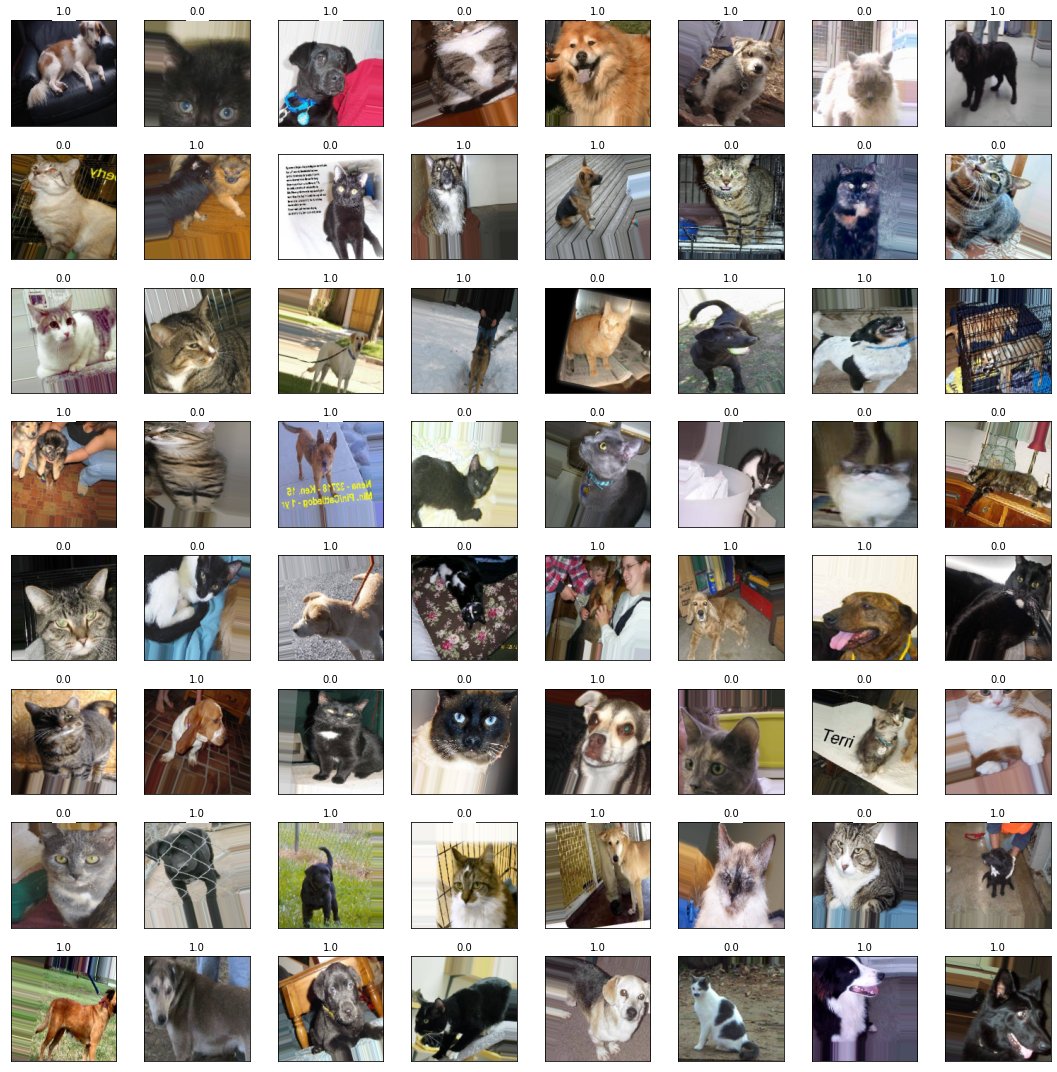

In [6]:
fig = plt.figure(figsize=(15, 15))

batch_1_img = training_set[0]
for i in range(64):
    digit = batch_1_img[0][i]
    label = batch_1_img[1][i]
    #digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit, cmap=plt.cm.binary)
    ax.set_title(str(label), backgroundcolor='white', fontsize=10)
plt.tight_layout()

## Model Training

Create the convolutional neural network model

In [7]:
model = Sequential()

model.add(keras.layers.Input(shape=(150, 150, 3)))
model.add(keras.layers.Conv2D(32, (3,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (3,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Shows the summary of the model

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0


Compile the model

In [9]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3,
                                         restore_best_weights=True,
                                         verbose=1)

Fit the model

In [10]:
history = model.fit(training_set, epochs=20, validation_data=validation_set, callbacks=callback)

Epoch 1/20
16/16 [==============================] - 21s 1s/step - loss: 2.2026 - accuracy: 0.4990 - val_loss: 0.7175 - val_accuracy: 0.5730
Epoch 2/20
16/16 [==============================] - 16s 1s/step - loss: 0.6958 - accuracy: 0.5580 - val_loss: 0.6705 - val_accuracy: 0.5460
Epoch 3/20
16/16 [==============================] - 16s 983ms/step - loss: 0.6674 - accuracy: 0.5710 - val_loss: 0.6616 - val_accuracy: 0.6090
Epoch 4/20
16/16 [==============================] - 15s 997ms/step - loss: 0.6734 - accuracy: 0.5720 - val_loss: 0.6983 - val_accuracy: 0.5230
Epoch 5/20
16/16 [==============================] - 16s 981ms/step - loss: 0.6627 - accuracy: 0.5945 - val_loss: 0.7001 - val_accuracy: 0.5700
Epoch 6/20
16/16 [==============================] - 16s 993ms/step - loss: 0.6672 - accuracy: 0.5790 - val_loss: 0.6443 - val_accuracy: 0.6130
Epoch 7/20
16/16 [==============================] - 16s 1s/step - loss: 0.6439 - accuracy: 0.6145 - val_loss: 0.6349 - val_accuracy: 0.6390
Epoch 8/

Evaluate the training set

In [11]:
model.evaluate(training_set)

16/16 [==============================] - 10s 645ms/step - loss: 0.5967 - accuracy: 0.6730


[0.5966640114784241, 0.6729999780654907]

Evaluate the validation set

In [12]:
model.evaluate(validation_set)

8/8 [==============================] - 5s 643ms/step - loss: 0.6016 - accuracy: 0.6740


[0.6016103625297546, 0.6740000247955322]

Plot the loss and accuracy plot

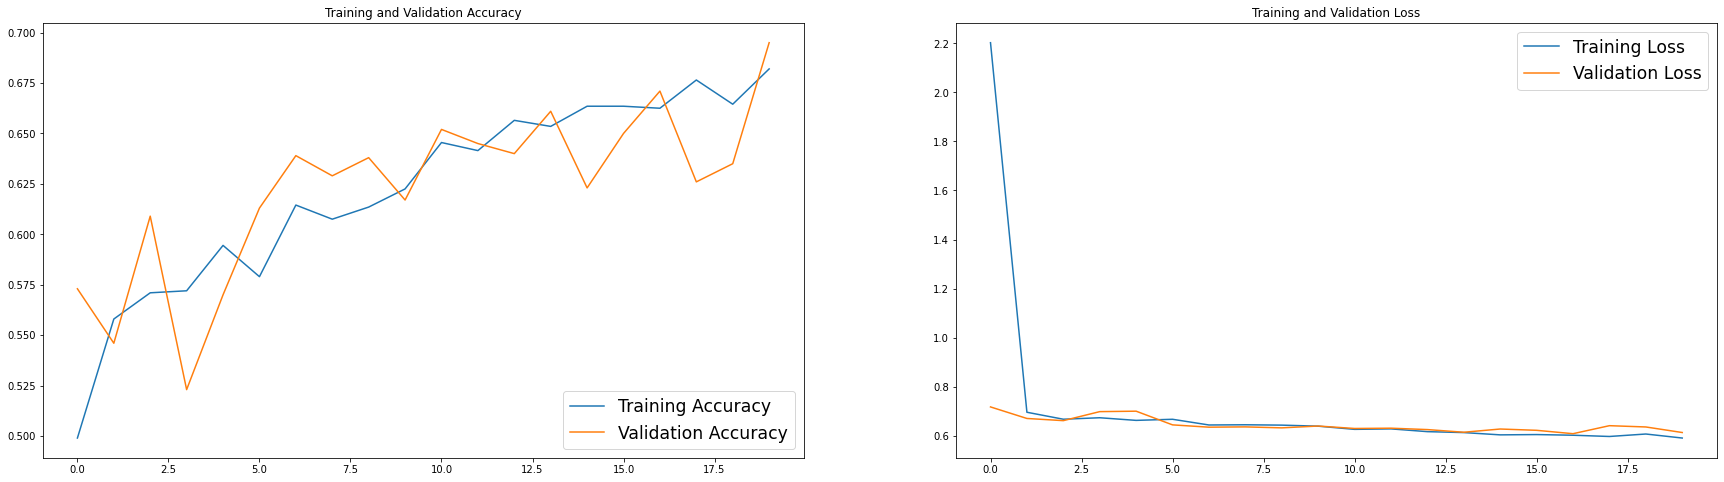

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(callback.stopped_epoch + 1)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right', fontsize="xx-large")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right', fontsize="xx-large")
plt.title('Training and Validation Loss')
plt.show()

Predict the testing set

In [14]:
probabilities = model.predict(testing_set).flatten()
probabilities

1/1 [==============================] - 1s 781ms/step


array([0.58989936, 0.2825206 , 0.3451063 , 0.60770977, 0.51664096,
       0.5620243 , 0.73046607, 0.42754552, 0.30665198, 0.9367366 ,
       0.7420361 , 0.67013705, 0.2754743 , 0.4675888 , 0.74557185,
       0.4786758 , 0.35719138, 0.62569743, 0.4056935 , 0.6231233 ,
       0.29900622, 0.48192522, 0.39589095, 0.6573019 , 0.58077306,
       0.55506635, 0.97215694, 0.528303  , 0.39858267, 0.4780654 ,
       0.4292398 , 0.33586967, 0.596855  , 0.9958177 , 0.39458176,
       0.6232954 , 0.9895894 , 0.76820016, 0.5775959 , 0.46390152,
       0.4992444 , 0.3953203 , 0.93273175, 0.4484233 , 0.5388113 ,
       0.36960483, 0.47750652, 0.3570016 , 0.32271165, 0.6484488 ],
      dtype=float32)

In [15]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {int(round(percentage_identified, 2)*100)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66% of the images of cats and dogs.
You passed the challenge!
